# Data Preprocessing for Linear Regression
## Linear Model Assumption
Linear models make the following assumptions over the independent variables X, used to predict Y:

- There is a linear relationship between X and the outcome Y
- The independent variables X are normally distributed
- There is no co-linearity among the independent variables
- Homoscedasticity (homogeneity of variance)

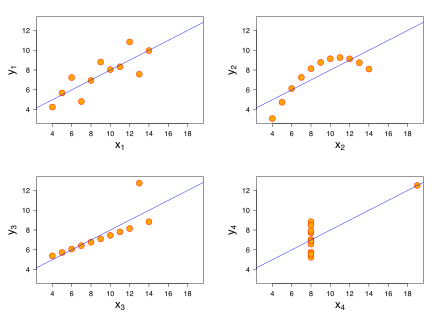

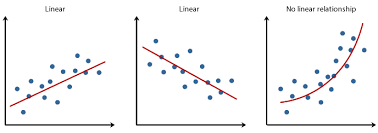

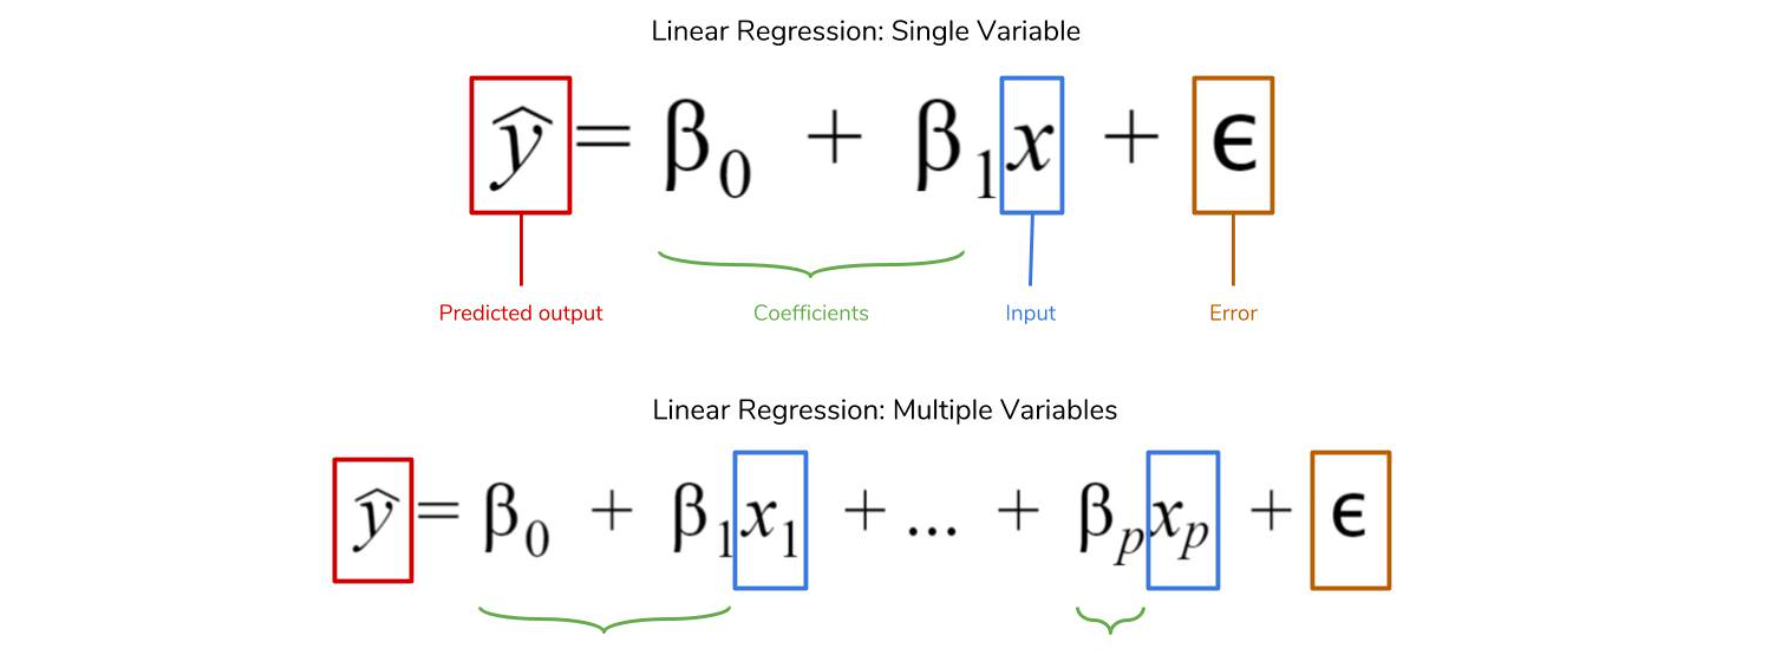

Linear machine learning models are:
- Linear and Logistic Regression
- Linear Discriminant Analysis (LDA)
- Principal Component Regressors

---

## Definitions:

**Linear relationship** describes a relationship between the independent variables X and the target Y that is given by:
Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.
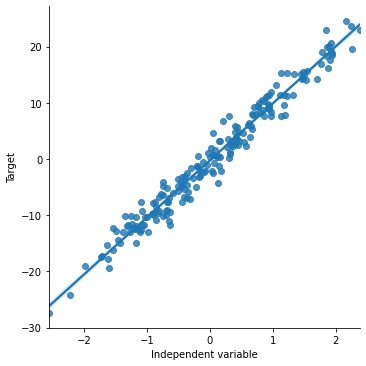

**Normality** means that every variable X follows a Gaussian distribution.
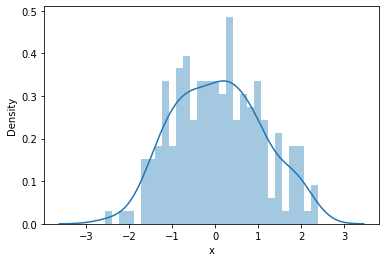


**Multi-colinearity** refers to the correlation of one independent variable with another. Variables should not be correlated.
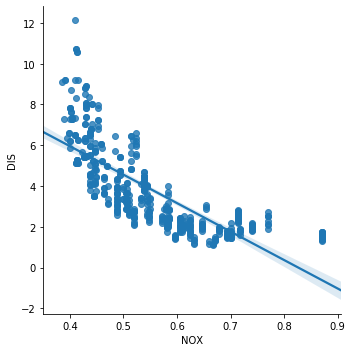


**Homoscedasticity**, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.
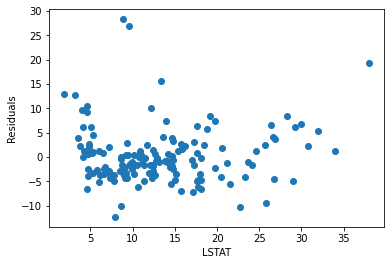
<hr>


### How can we evaluate if the assumptions are met by the variables?

- Linear regression can be assessed by scatter-plots and residuals plots
- Normal distribution can be assessed by Q-Q plots (A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. )
- Multi-colinearity can be assessed by correlation matrices
- Homoscedasticity can be assessed by residuals plots

## Let's Start!

We will start by importing all the libraries we need throughout this video lesson.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

In [3]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(data.data, columns=data.feature_names)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
boston['Price'] = data.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
features = data.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Create a Reference Data

In [9]:
boston.shape

(506, 14)

In [11]:
np.random.seed(0)

n=boston.shape[0]
x = np.random.randn(n)
# y = beta0 + beta1*x + error
y = 10*x + np.random.randn(n)*2



In [15]:
demo_df = pd.DataFrame([x,y]).T

In [17]:
demo_df.columns = ['x', 'y']
demo_df.head()

,x,y
0,1.764052,14.375254
1,0.400157,0.866037
2,0.978738,7.429064
3,2.240893,25.011788
4,1.867558,20.466100


## 1. Check Linear Assumption for Boston Dataset 

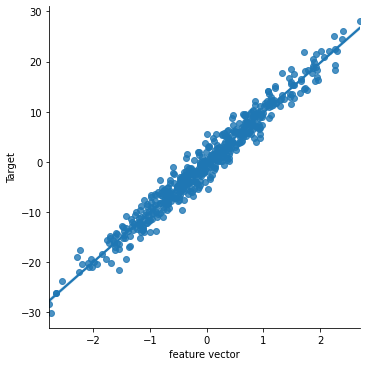

In [19]:
sns.lmplot(x='x', y='y', data=demo_df, order=1)
plt.ylabel('Target')
plt.xlabel('feature vector')
plt.show()

In [20]:
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

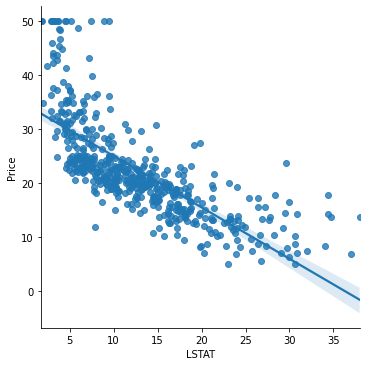

In [21]:
sns.lmplot(x='LSTAT', y='Price', data=boston, order=1)

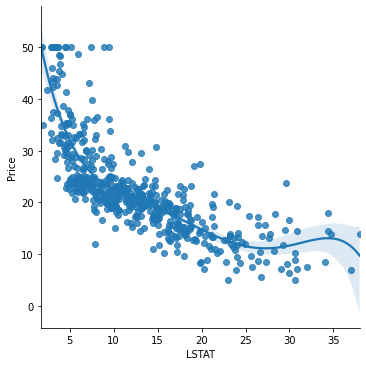

In [26]:
sns.lmplot(x='LSTAT', y='Price', data=boston, order=5)

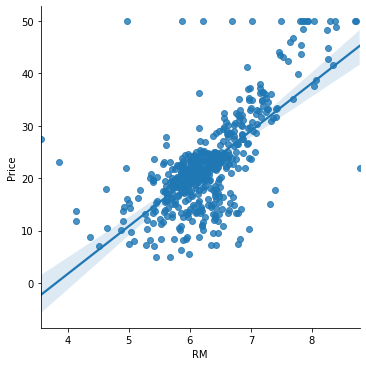

In [27]:
sns.lmplot(x='RM', y='Price', data=boston, order=1)

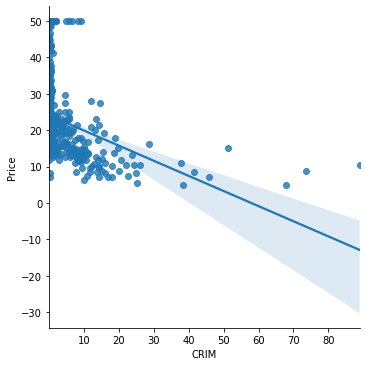

In [28]:
sns.lmplot(x='CRIM', y='Price', data=boston, order=1)

### Variable Transformation

In [29]:
boston['log_lstat'] = np.log(boston['LSTAT'])

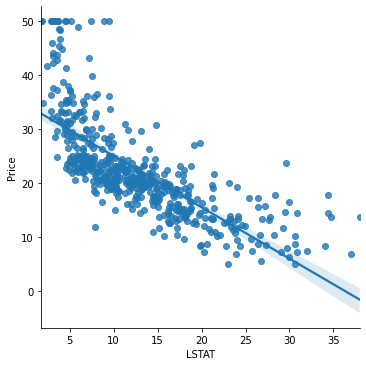

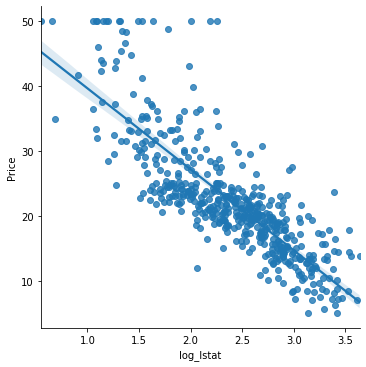

In [32]:
sns.lmplot(x='LSTAT', y='Price', data=boston, order=1)
sns.lmplot(x='log_lstat', y='Price', data=boston, order=1)

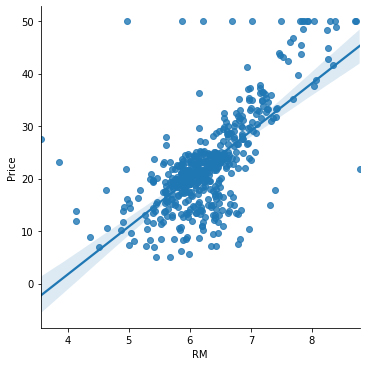

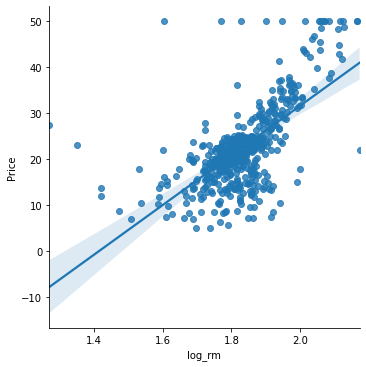

In [33]:
boston['log_rm'] = np.log(boston['RM'])
sns.lmplot(x='RM', y='Price', data=boston, order=1)
sns.lmplot(x='log_rm', y='Price', data=boston, order=1)

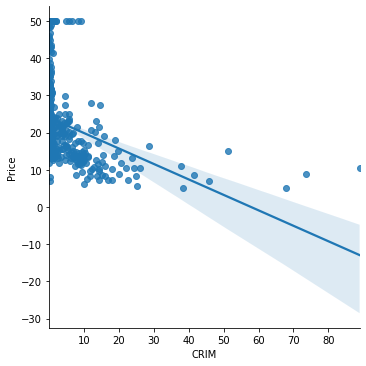

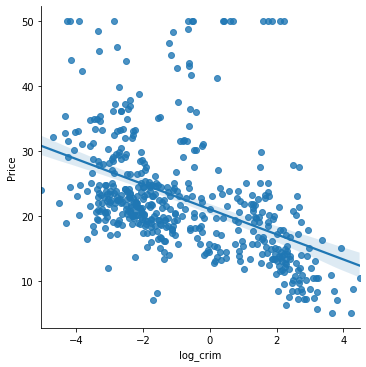

In [36]:
boston['log_crim'] = np.log(boston['CRIM'])
sns.lmplot(x='CRIM', y='Price', data=boston, order=1)
sns.lmplot(x='log_crim', y='Price', data=boston, order=1)

### Variable Transformation with `sklearn` 

The most commonly used methods to transform variables are:

- Logarithmic transformation - $np.log(X)$
- Reciprocal transformation - $1 / X$
- Square root transformation - $sqrt(X)$
- Exponential transformation
- Box-Cox transformation
- Yeo-Johnson transformation

### Reciprocal Transformation 

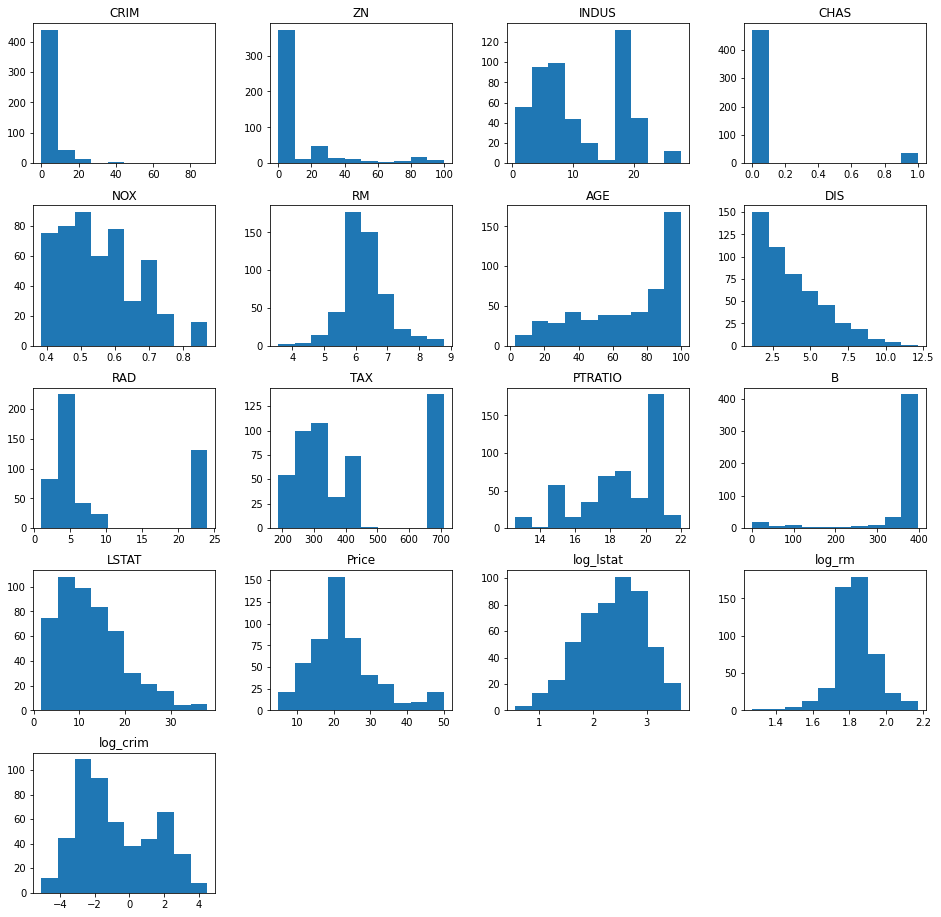

In [43]:
boston.hist(figsize=(16,16), grid=False)
plt.show()

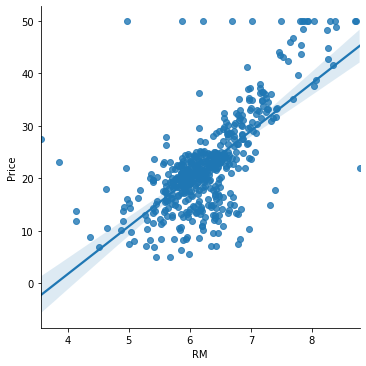

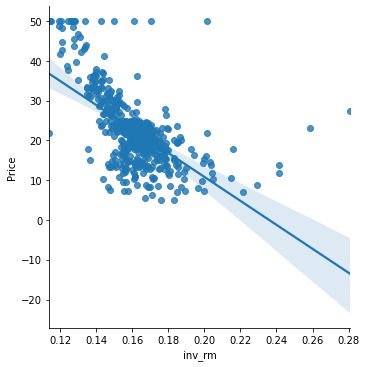

In [44]:
boston['inv_rm'] = 1/(boston['RM'])
sns.lmplot(x='RM', y='Price', data=boston, order=1)
sns.lmplot(x='inv_rm', y='Price', data=boston, order=1)

### `sqrt` and `exp` Transformation 

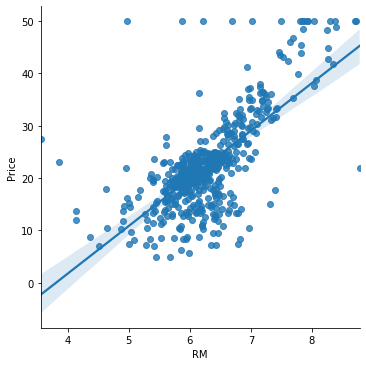

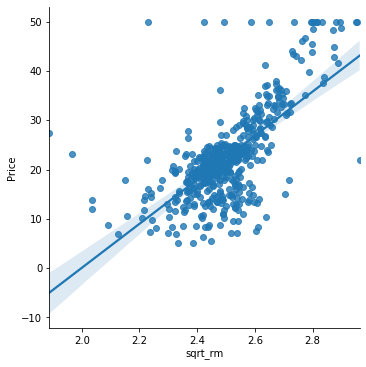

In [45]:
boston['sqrt_rm'] = np.sqrt(boston['RM'])
sns.lmplot(x='RM', y='Price', data=boston, order=1)
sns.lmplot(x='sqrt_rm', y='Price', data=boston, order=1)

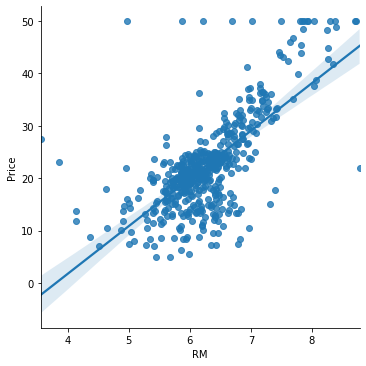

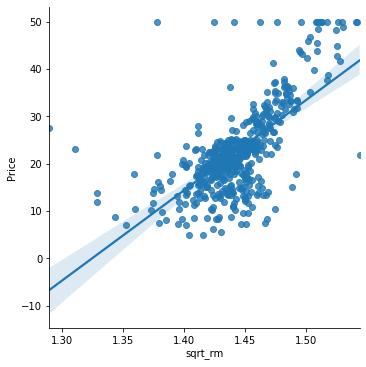

In [49]:
boston['sqrt_rm'] = (boston['RM'])**(1/5)
sns.lmplot(x='RM', y='Price', data=boston, order=1)
sns.lmplot(x='sqrt_rm', y='Price', data=boston, order=1)

### Box-Cox Transformation 

In [50]:
from sklearn.preprocessing import PowerTransformer

In [51]:
transformer = PowerTransformer(method='box-cox', standardize=False)

In [58]:
boston['box_rm'] = transformer.fit_transform(boston[['RM']])

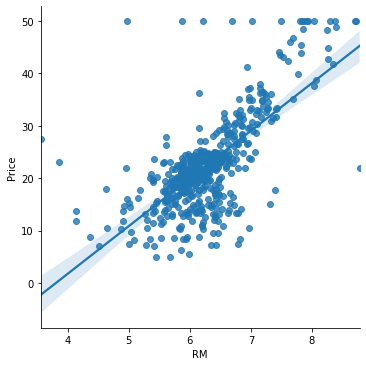

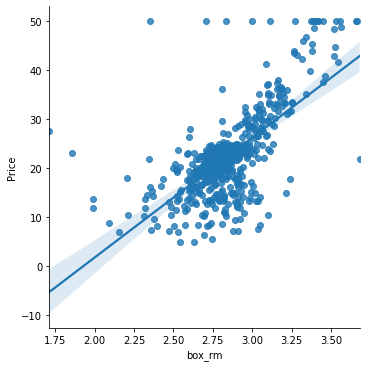

In [61]:
sns.lmplot(x='RM', y='Price', data=boston, order=1)
sns.lmplot(x='box_rm', y='Price', data=boston, order=1)

### Yeo-Johnson Transformation
 

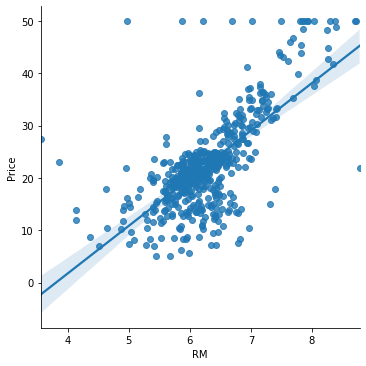

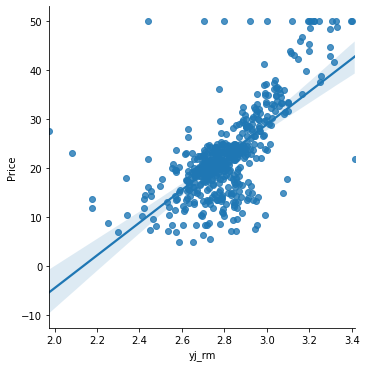

In [63]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

boston['yj_rm'] = transformer.fit_transform(boston[['RM']])

sns.lmplot(x='RM', y='Price', data=boston, order=1)
sns.lmplot(x='yj_rm', y='Price', data=boston, order=1)

### Check Variables Normality 

- Linear regression can be assessed by scatter-plots and residuals plots
- Normal distribution can be assessed by Q-Q plots (A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. )
- Multi-colinearity can be assessed by correlation matrices
- Homoscedasticity can be assessed by residuals plots

#### Histogram 

In [ ]:
# cols = ['RM', 'LSTAT', 'CRIM']

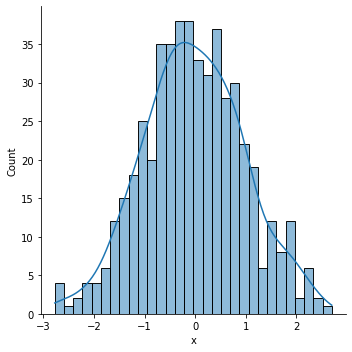

In [66]:
sns.displot(demo_df['x'], bins=30, kde=True)

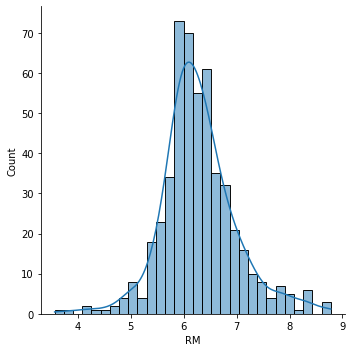

In [67]:
sns.displot(boston['RM'], bins=30, kde=True)

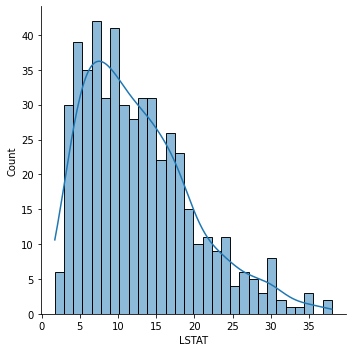

In [68]:
sns.displot(boston['LSTAT'], bins=30, kde=True)

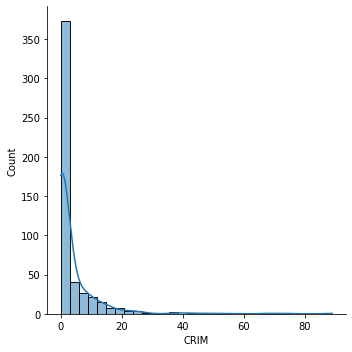

In [69]:
sns.displot(boston['CRIM'], bins=30, kde=True)

#### Q-Q Plot 

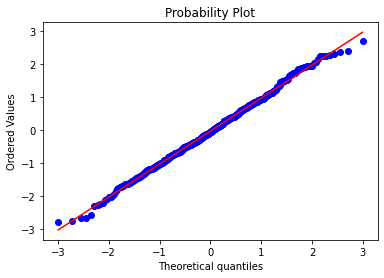

In [70]:
stats.probplot(demo_df['x'], dist='norm', plot=plt)
plt.show()

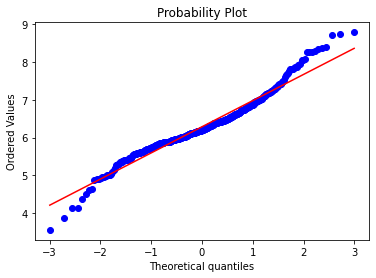

In [72]:
stats.probplot(boston['RM'], dist='norm', plot=plt)
plt.show()

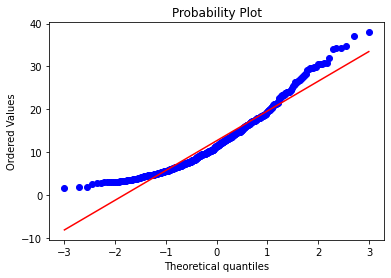

In [73]:
stats.probplot(boston['LSTAT'], dist='norm', plot=plt)
plt.show()

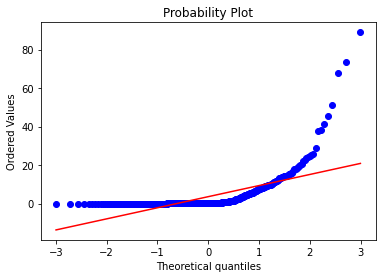

In [74]:
stats.probplot(boston['CRIM'], dist='norm', plot=plt)
plt.show()

#### Variable Transformation for Normality 

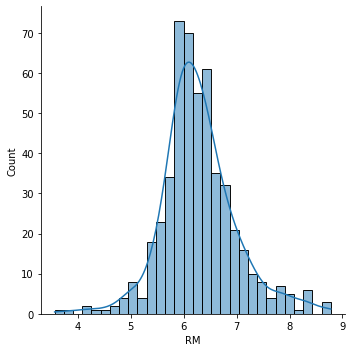

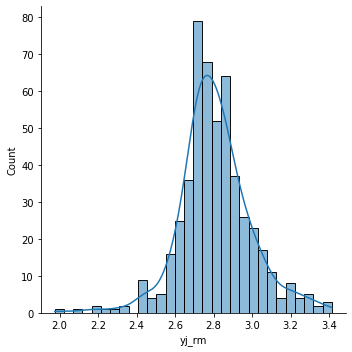

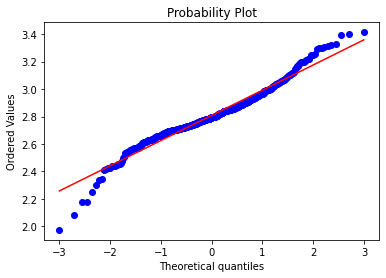

In [76]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
boston['yj_rm'] = transformer.fit_transform(boston[['RM']])

sns.displot(boston['RM'], bins=30, kde=True)
sns.displot(boston['yj_rm'], bins=30, kde=True)
plt.figure()
stats.probplot(boston['yj_rm'], dist='norm', plot=plt)
plt.show()

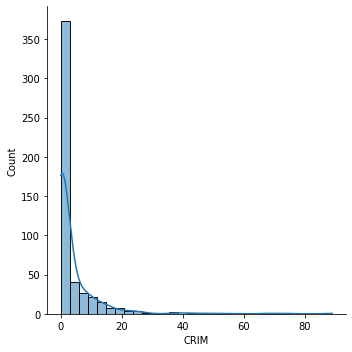

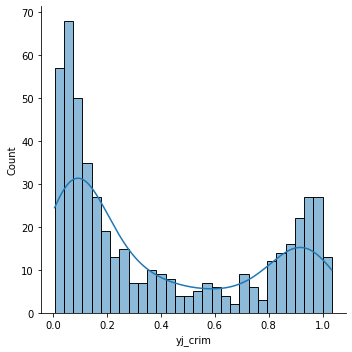

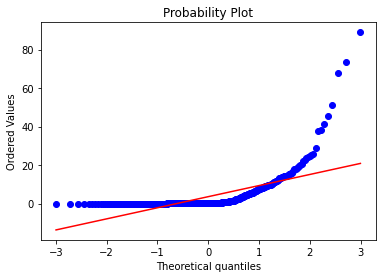

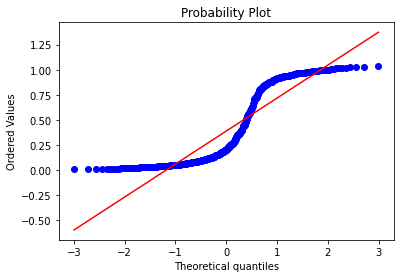

In [78]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
boston['yj_crim'] = transformer.fit_transform(boston[['CRIM']])

sns.displot(boston['CRIM'], bins=30, kde=True)
sns.displot(boston['yj_crim'], bins=30, kde=True)

plt.figure()
stats.probplot(boston['CRIM'], dist='norm', plot=plt)

plt.figure()
stats.probplot(boston['yj_crim'], dist='norm', plot=plt)
plt.show()

## Homoscedasticity 

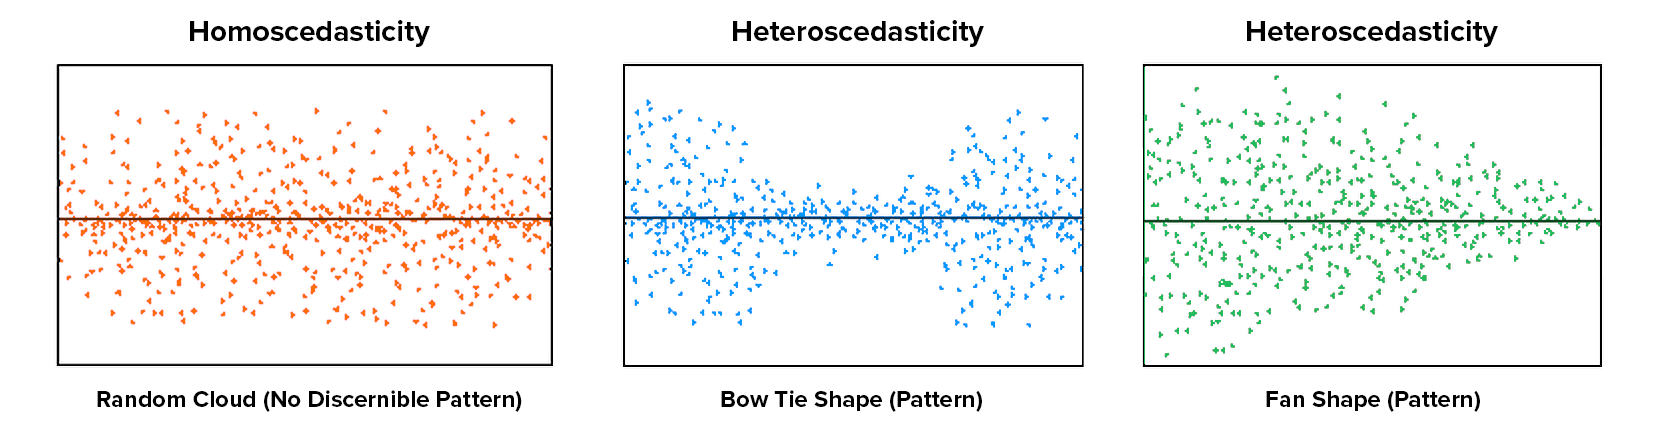

Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(boston[['CRIM']], boston['Price'], test_size=0.2, random_state=0)

In [90]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

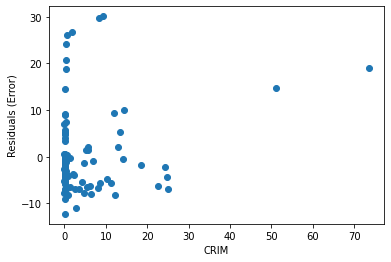

In [91]:
y_pred = model.predict(X_test)

error = y_test-y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals (Error)')
plt.show()

In [92]:
mean_squared_error(y_test, y_pred)

76.38674157646072

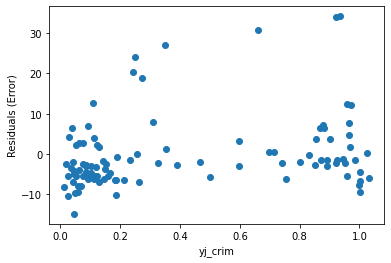

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    boston[['yj_crim']], boston['Price'], test_size=0.2, random_state=0)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

error = y_test-y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('yj_crim')
plt.ylabel('Residuals (Error)')
plt.show()

In [94]:
mean_squared_error(y_test, y_pred)

81.72056109109016

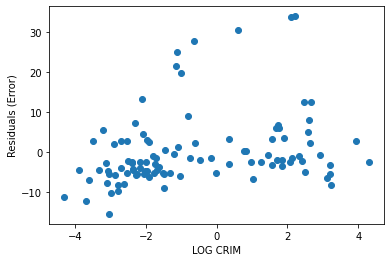

MSE:  83.15446264207897


In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    np.log(boston[['CRIM']]), boston['Price'], test_size=0.2, random_state=0)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

error = y_test-y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('LOG CRIM')
plt.ylabel('Residuals (Error)')
plt.show()

print('MSE: ', mean_squared_error(y_test, y_pred))

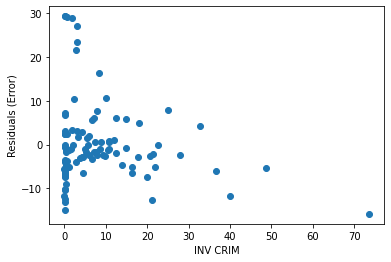

MSE:  84.4882923234821


In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    1/(boston[['CRIM']]), boston['Price'], test_size=0.2, random_state=0)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

error = y_test-y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('INV CRIM')
plt.ylabel('Residuals (Error)')
plt.show()

print('MSE: ', mean_squared_error(y_test, y_pred))

## Multicolinearity 

- Linear regression can be assessed by scatter-plots and residuals plots
- Normal distribution can be assessed by Q-Q plots (A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. )
- Multi-colinearity can be assessed by correlation matrices
- Homoscedasticity can be assessed by residuals plots

In [99]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,Price,log_lstat,log_rm,log_crim,inv_rm,sqrt_rm,box_rm,yj_rm,yj_crim
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,4.98,24.0,1.605430,1.883275,-5.064036,0.152091,1.457401,2.960568,2.890682,0.006281
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,9.14,21.6,2.212660,1.859574,-3.600502,0.155739,1.450509,2.905658,2.850510,0.026600
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,4.03,34.7,1.393766,1.971996,-3.601235,0.139179,1.483492,3.171386,3.044659,0.026581
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,2.94,33.4,1.078410,1.945624,-3.430523,0.142898,1.475689,3.107843,2.998295,0.031378
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,5.33,36.2,1.673351,1.966693,-2.672924,0.139919,1.481920,3.158548,3.035295,0.064688


In [100]:
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [101]:
corr_mat = boston[features].corr().round(2)
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


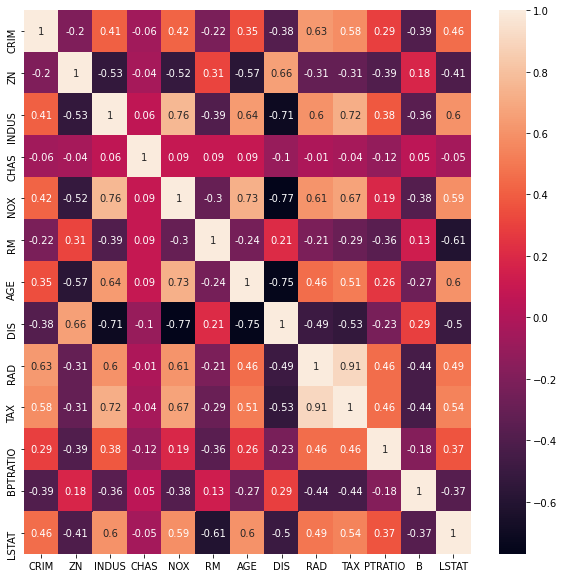

In [102]:
plt.subplots(figsize=(10,10))
ax = sns.heatmap(data=corr_mat, annot=True)
plt.show()

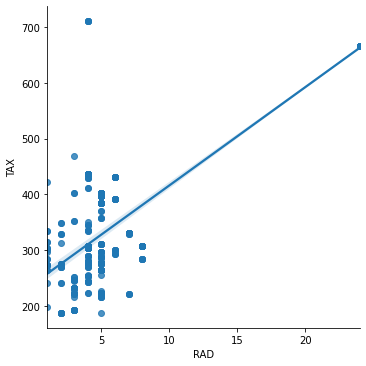

In [103]:
sns.lmplot(x='RAD', y='TAX', data=boston, order=1)

## Normalization and Standardization 

#### Standardization 
`Standardization` of data sets is a common requirement for many machine learning `estimators` implemented in `scikit-learn`; they might behave `badly` if the individual features do not more or less look like `standard normally distributed data`: `Gaussian` with `zero mean` and `unit variance`.

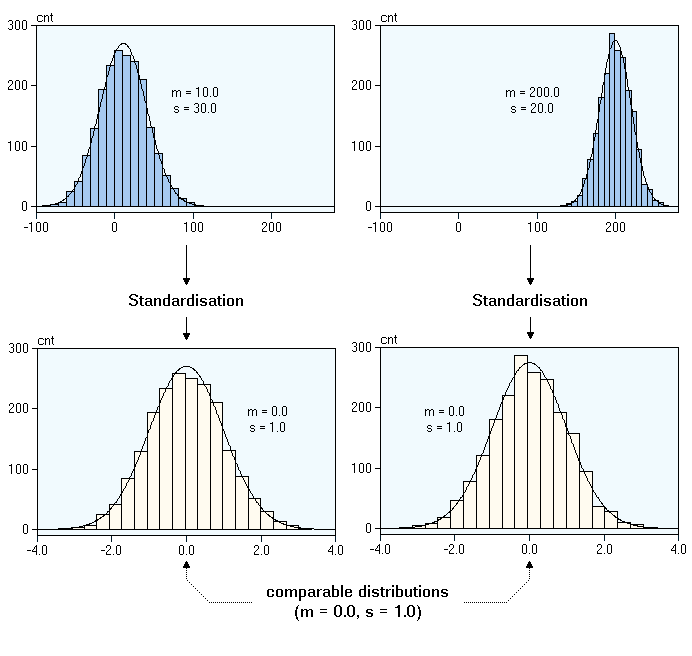

#### Normalization 

`Normalization` is the process of scaling individual samples to have `unit norm`. This process can be useful if you plan to use a quadratic form such as the dot-product or any other `kernel` to quantify the similarity of any pair of samples.

This assumption is the base of the `Vector Space Model` often used in `text classification` and `clustering contexts`.

|         Name | Sklearn_class |
|-------------|------------|
|Standard scaler | Standard scaler | 
|MinMaxScaler    | MinMax Scaler   |
|MaxAbs Scaler   | MaxAbs Scaler   |
|Robust scaler   | Robust scaler   |
|Quantile Transformer_Normal | Quantile Transformer(output_distribution ='normal')|
|Quantile Transformer_Uniform| Quantile Transformer(output_distribution = 'uniform')|
|PowerTransformer-Yeo-Johnson| PowerTransformer(method = 'yeo-johnson')|
|Normalizer | Normalizer|

In [104]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,Price,log_lstat,log_rm,log_crim,inv_rm,sqrt_rm,box_rm,yj_rm,yj_crim
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,...,12.653063,22.532806,2.370965,1.831864,-0.780436,0.161140,1.442855,2.848605,2.808501,0.387794
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,...,7.141062,9.197104,0.600891,0.112325,2.162050,0.018657,0.032323,0.254723,0.186378,0.361587
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,...,1.730000,5.000000,0.548121,1.270041,-5.064036,0.113895,1.289182,1.711994,1.974607,0.006281
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,...,6.950000,17.025000,1.938729,1.772492,-2.500488,0.150978,1.425465,2.708847,2.706329,0.075960
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,...,11.360000,21.200000,2.430097,1.825919,-1.360641,0.161070,1.440779,2.828683,2.794154,0.205179
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,...,16.955000,25.000000,2.830563,1.890624,1.302119,0.169909,1.459545,2.977714,2.903221,0.807667
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,...,37.970000,50.000000,3.636796,2.172476,4.488369,0.280820,1.544183,3.679856,3.414035,1.033994


In [105]:
from sklearn.preprocessing import StandardScaler

In [107]:
# boston[features]

In [109]:
# scaler = StandardScaler()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
   boston[features], boston['Price'], test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Without Preprocessing MSE: ', mean_squared_error(y_test, y_pred))

Without Preprocessing MSE:  33.448979997676524


In [112]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
   boston[features], boston['Price'], test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Standardized MSE: ', mean_squared_error(y_test, y_pred))

Standardized MSE:  33.448979997676496


In [114]:
X_train, X_test, y_train, y_test = train_test_split(
   boston[features], boston['Price'], test_size=0.2, random_state=0)

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Normalized MSE: ', mean_squared_error(y_test, y_pred))

Normalized MSE:  33.44897999767649
